# 📝 Step 1: Load the Clean Dataset
:

In [2]:
import pandas as pd


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("cleaned_blinkit_inventory.csv")


df.head()


Saving cleaned_blinkit_inventory.csv to cleaned_blinkit_inventory.csv


product_id        date  stock_received  damaged_stock
0      153019  2023-03-17               4              2
1      848226  2023-03-17               4              2
2      965755  2023-03-17               1              0
3       39154  2023-03-17               4              0
4       34186  2023-03-17               3              2

# 📊 Step 2: Total Stock Received per Product


In [3]:

total_stock_per_product = df.groupby('product_id')['stock_received'].sum().reset_index()
total_stock_per_product = total_stock_per_product.sort_values(by='stock_received', ascending=False)

total_stock_per_product.head(10)


product_id  stock_received
121      490602             980
69       287070             927
202      760684             924
242      903336             917
34       120532             879
67       274207             869
248      937542             869
232      876139             867
85       354409             852
250      945635             849

# ❌ Step 3: Most Damaged Products


In [4]:

damaged_stock_per_product = df.groupby('product_id')['damaged_stock'].sum().reset_index()

damaged_stock_per_product = damaged_stock_per_product.sort_values(by='damaged_stock', ascending=False)

damaged_stock_per_product.head(10)


product_id  damaged_stock
246      927651            360
51       186168            356
228      853932            352
182      692985            349
235      888807            347
193      723678            345
206      767398            345
190      712307            345
180      689769            345
116      473929            344

# 📉 Step 4: Damage Rate per Product


In [5]:

merged_df = df.groupby('product_id')[['stock_received', 'damaged_stock']].sum().reset_index()

merged_df['damage_rate'] = (merged_df['damaged_stock'] / merged_df['stock_received']) * 100

merged_df = merged_df.sort_values(by='damage_rate', ascending=False)

merged_df.head(10)


product_id  stock_received  damaged_stock  damage_rate
188      709916             342            328    95.906433
206      767398             387            345    89.147287
106      448752             344            301    87.500000
240      897083             367            307    83.651226
196      739448             390            320    82.051282
197      739534             369            300    81.300813
115      473647             387            313    80.878553
40       133542             381            300    78.740157
2          9436             375            289    77.066667
239      894539             401            302    75.311721

# 📈 Step 5: Bar Chart - Top 10 Damaged Products


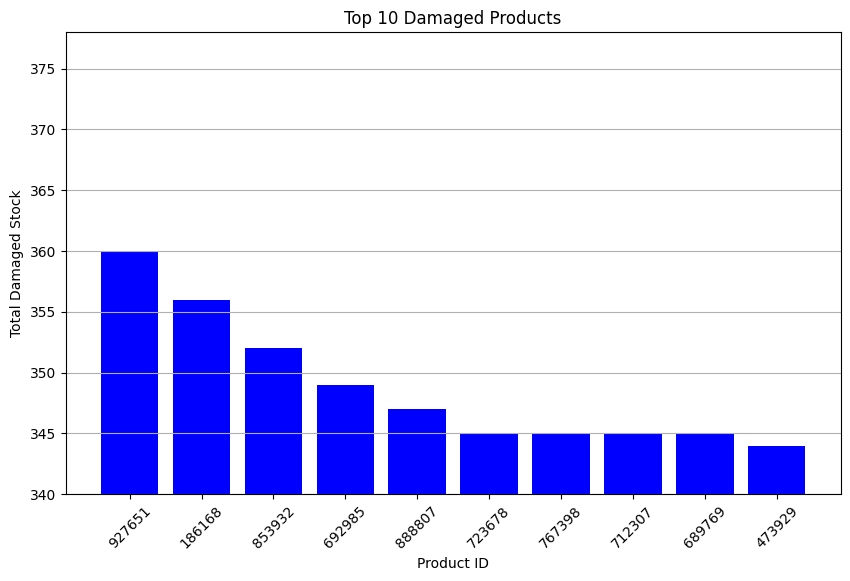

In [6]:
# Visualizing the top 10 products with the highest damaged stock using a blue bar chart, starting the Y-axis from 340

import matplotlib.pyplot as plt

top_damaged = damaged_stock_per_product.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_damaged['product_id'].astype(str), top_damaged['damaged_stock'], color='blue')
plt.xlabel('Product ID')
plt.ylabel('Total Damaged Stock')
plt.title('Top 10 Damaged Products')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(340, plt.ylim()[1])
plt.show()


# Distribution of Damages Over Time

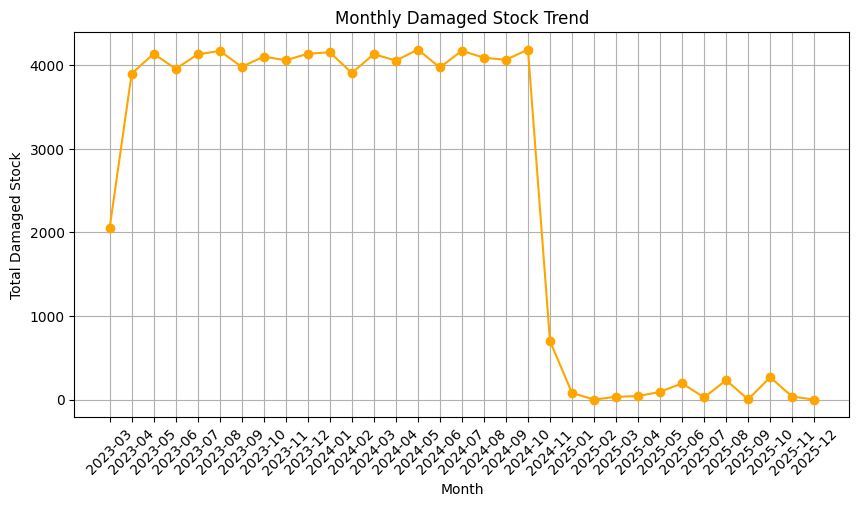

In [7]:
# Analyzing and visualizing the monthly trend of damaged stock using a line chart

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

monthly_damage = df.groupby('month')['damaged_stock'].sum().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_damage['month'].astype(str), monthly_damage['damaged_stock'], marker='o', color='orange')
plt.title('Monthly Damaged Stock Trend')
plt.xlabel('Month')
plt.ylabel('Total Damaged Stock')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



# Correlation Between Stock Received and Damaged Stock

Correlation between Stock Received and Damaged Stock:
                stock_received  damaged_stock
stock_received        1.000000      -0.613134
damaged_stock        -0.613134       1.000000


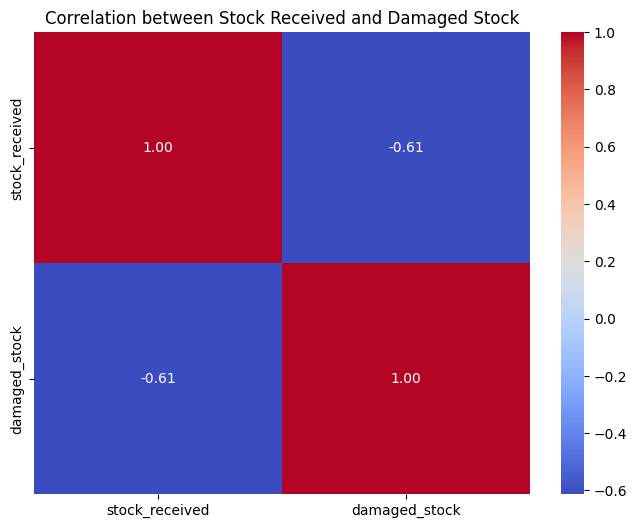

In [ ]:
# Calculating and visualizing the correlation between stock received and damaged stock using a heatmap

correlation = df[['stock_received', 'damaged_stock']].corr()
print("Correlation between Stock Received and Damaged Stock:")
print(correlation)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Stock Received and Damaged Stock')
plt.show()


# Impact of Product on Damage Rate

In [ ]:

merged_df = df.groupby('product_id')[['stock_received', 'damaged_stock']].sum().reset_index()
merged_df['damage_rate'] = (merged_df['damaged_stock'] / merged_df['stock_received']) * 100

merged_df = merged_df.sort_values(by='damage_rate', ascending=False)

print("Top 10 Products with Highest Damage Rate:")
print(merged_df.head(10))


Top 10 Products with Highest Damage Rate:
     product_id  stock_received  damaged_stock  damage_rate
188      709916             342            328    95.906433
206      767398             387            345    89.147287
106      448752             344            301    87.500000
240      897083             367            307    83.651226
196      739448             390            320    82.051282
197      739534             369            300    81.300813
115      473647             387            313    80.878553
40       133542             381            300    78.740157
2          9436             375            289    77.066667
239      894539             401            302    75.311721


# Products with High Damage Rates

In [ ]:

high_damage = merged_df[merged_df['damage_rate'] > 10]

print("Top 10 Products with High Damage Rate:")
print(high_damage.head(10))


Top 10 Products with High Damage Rate:
     product_id  stock_received  damaged_stock  damage_rate
188      709916             342            328    95.906433
206      767398             387            345    89.147287
106      448752             344            301    87.500000
240      897083             367            307    83.651226
196      739448             390            320    82.051282
197      739534             369            300    81.300813
115      473647             387            313    80.878553
40       133542             381            300    78.740157
2          9436             375            289    77.066667
239      894539             401            302    75.311721


In [ ]:

print("Dataset Columns:")
print(df.columns)


Dataset Columns:
Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')


# Analysis of Damaged Stock by Month

In [ ]:

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
monthly_damage = df.groupby('month')['damaged_stock'].sum().reset_index()
monthly_damage = monthly_damage.sort_values(by='damaged_stock', ascending=False)
print("Top 10 Months with Highest Damaged Stock:")
print(monthly_damage.head(10))


Top 10 Months with Highest Damaged Stock:
      month  damaged_stock
14  2024-05           4188
19  2024-10           4188
16  2024-07           4174
5   2023-08           4172
10  2024-01           4156
2   2023-05           4138
9   2023-12           4138
12  2024-03           4134
4   2023-07           4130
7   2023-10           4104


# Damage Frequency per Product

In [ ]:

product_damage_count = df[df['damaged_stock'] > 0].groupby('product_id').size().reset_index(name='damage_count')
product_damage_count = product_damage_count.sort_values(by='damage_count', ascending=False)
product_damage_count.head(10)


product_id  damage_count
246      927651           182
51       186168           179
182      692985           177
228      853932           177
235      888807           176
206      767398           175
193      723678           174
180      689769           174
190      712307           174
116      473929           173

In [ ]:

print(df.columns)


Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'month'], dtype='object')


# Total Damaged Stock by Product

In [ ]:

product_damage = df.groupby('product_id')['damaged_stock'].sum().reset_index()
product_damage = product_damage.sort_values(by='damaged_stock', ascending=False)
product_damage.head(10)


product_id  damaged_stock
246      927651            360
51       186168            356
228      853932            352
182      692985            349
235      888807            347
193      723678            345
206      767398            345
190      712307            345
180      689769            345
116      473929            344

# Saving the Damaged Stock Analysis Results

In [ ]:
high_damage = merged_df[merged_df['damage_rate'] > 10]
high_damage.head()


product_id  stock_received  damaged_stock  damage_rate
188      709916             342            328    95.906433
206      767398             387            345    89.147287
106      448752             344            301    87.500000
240      897083             367            307    83.651226
196      739448             390            320    82.051282

In [ ]:
merged_df.to_csv("product_damage_summary.csv", index=False)
